In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',18)

1.读入数据

In [2]:
#读入训练集数据
train=pd.read_csv('case2_training.csv')
train=train.copy()
test = pd.read_csv("case2_testing.csv")
test=test.copy()
train.head()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1


2.描述性统计分析

In [3]:
train.shape, test.shape

((50000, 10), (20000, 9))

In [4]:
train.columns, test.columns

(Index(['ID', 'Region', 'Date', 'Weekday', 'Apartment', 'Beds', 'Review',
        'Pic Quality', 'Price', 'Accept'],
       dtype='object'),
 Index(['ID', 'Region', 'Date', 'Weekday', 'Apartment', 'Beds', 'Review',
        'Pic Quality', 'Price'],
       dtype='object'))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           50000 non-null  int64  
 1   Region       50000 non-null  int64  
 2   Date         50000 non-null  int64  
 3   Weekday      50000 non-null  int64  
 4   Apartment    50000 non-null  int64  
 5   Beds         50000 non-null  int64  
 6   Review       50000 non-null  float64
 7   Pic Quality  50000 non-null  float64
 8   Price        50000 non-null  float64
 9   Accept       50000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.8 MB


In [6]:
train['Accept'].value_counts(normalize=True)

0    0.72968
1    0.27032
Name: Accept, dtype: float64

<AxesSubplot:>

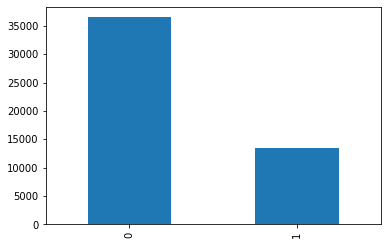

In [7]:
train['Accept'].value_counts().plot.bar()

3.Independent Variable (Categorical)

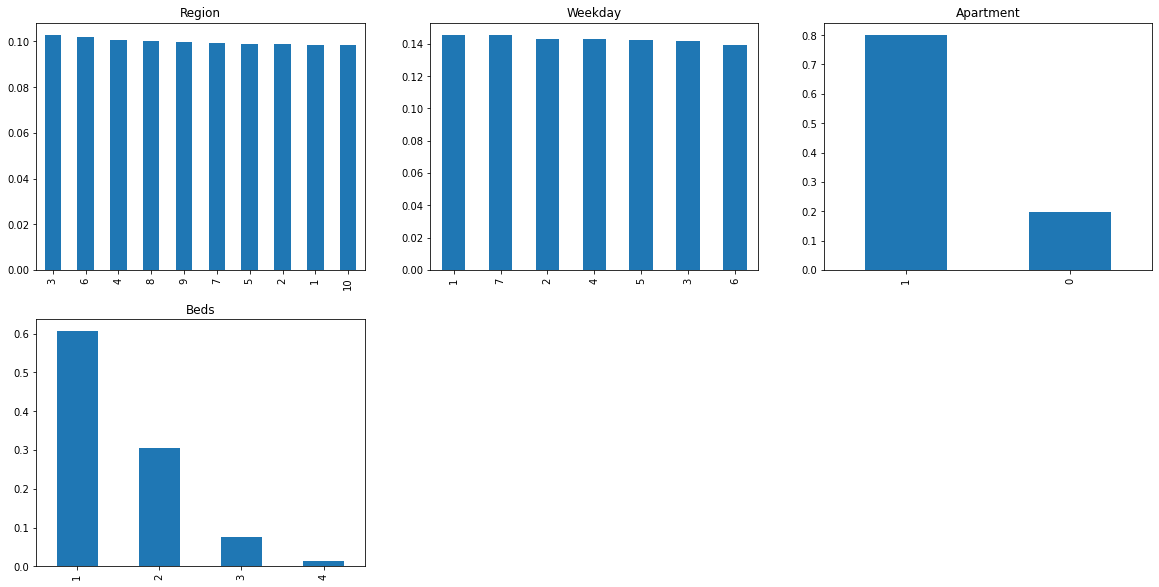

In [8]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['Region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Region')

plt.subplot(232)
train['Weekday'].value_counts(normalize=True).plot.bar(title= 'Weekday')

plt.subplot(233)
train['Apartment'].value_counts(normalize=True).plot.bar(title= 'Apartment')

plt.subplot(234)
train['Beds'].value_counts(normalize=True).plot.bar(title= 'Beds')

plt.show()

4.Independent Variable (Numerical)

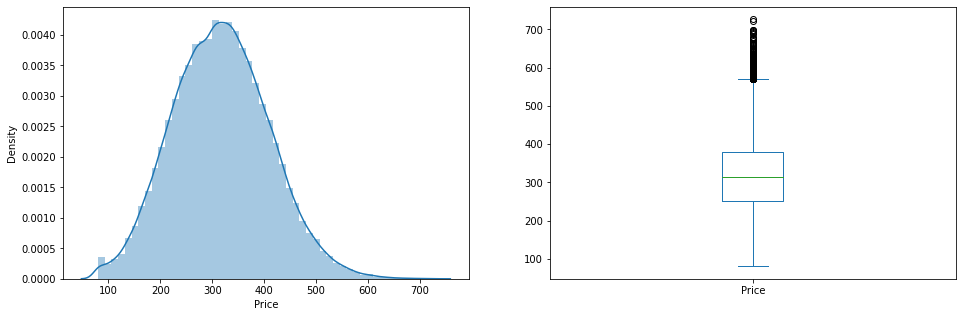

In [9]:
plt.subplot(121)
sns.distplot(train['Price']);

plt.subplot(122)
train['Price'].plot.box(figsize=(16,5))

plt.show()

标准化'Price'变量

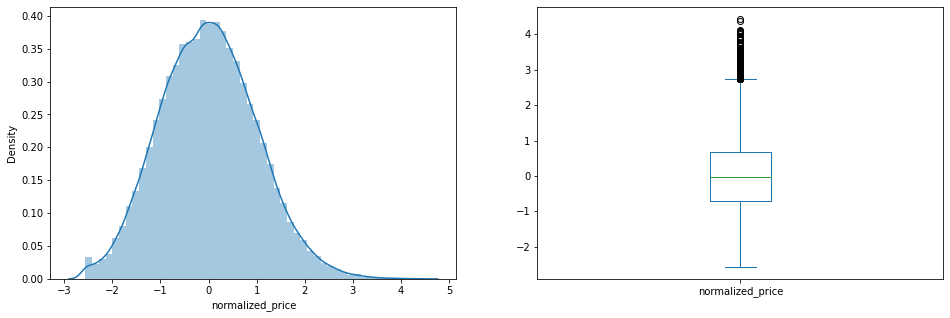

In [10]:
#标准化'Price'变量
train['normalized_price'] = (train['Price'] - train['Price'].mean()) / (train['Price'].std())
# del train['Price']
plt.subplot(121)
sns.distplot(train['normalized_price']);
plt.subplot(122)
train['normalized_price'].plot.box(figsize=(16,5))
plt.show()

分类自变量与目标变量

Accept     0     1
Region            
1       3607  1326
2       3589  1346
3       3729  1422
4       3657  1379
5       3612  1340
6       3724  1374
7       3641  1336
8       3628  1372
9       3675  1319
10      3622  1302


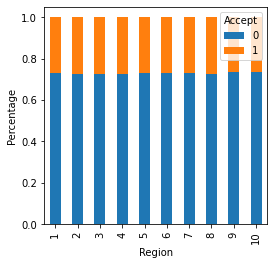

In [11]:
#区域是否会对购买产生任何影响
print(pd.crosstab(train['Region'],train['Accept']))

Region = pd.crosstab(train['Region'],train['Accept'])
Region.div(Region.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Region')
p = plt.ylabel('Percentage')
plt.show()

Accept         0      1
Apartment              
0           7230   2678
1          29254  10838


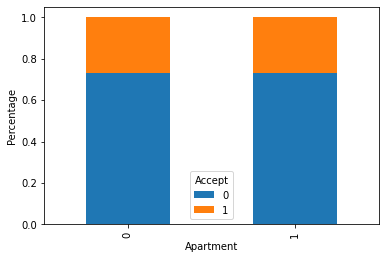

In [12]:
#Apartment是否会对购买产生任何影响
print(pd.crosstab(train['Apartment'],train['Accept']))

Apartment=pd.crosstab(train['Apartment'],train['Accept'])
Apartment.div(Apartment.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Apartment')
p = plt.ylabel('Percentage')
plt.show()


Accept      0     1
Beds               
1       22149  8166
2       11129  4113
3        2719  1064
4         487   173


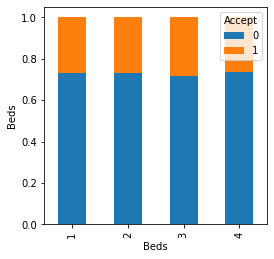

In [13]:
#Beds是否会对购买产生任何影响
print(pd.crosstab(train['Beds'],train['Accept']))

Self_Employed=pd.crosstab(train['Beds'],train['Accept'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Beds')
p = plt.ylabel('Beds')
plt.show()

In [ ]:
#删去‘ID’变量
del train['ID']
#把日期（365天）归类转化为季度（1,2,3,4季度）
def assign_label(h):
    if h >=0 and h < 92:
        return 1
    elif h >= 92 and h <183:
        return 2
    elif h >=183 and h <275 :
        return 3
    elif h >= 275 and h < 366:
        return 4

train["date_label"] = train["Date"].apply(assign_label)
del train['Date']

#将周日到周四归为类别1，周五和周六归为类别2
def assign_week(h):
    if h >=0 and h < 5 or h>=7:
        return 1
    elif h >= 5 and h <7:
        return 2

train["week_label"] = train["Weekday"].apply(assign_week)
del train['Weekday']
#将原训练集里代表类别的特征‘Region’虚拟化处理
dum=pd.get_dummies(train['Region'],prefix="Region")
train=pd.concat([train,dum],axis=1)
del train['Region']

#转换后的transform_train留作给不同的算法使用
transform_train=train

#显示特征转换后的前五行
print(train.head())


In [ ]:
#data是否会对购买产生任何影响
print(pd.crosstab(train['date_label'],train['Accept']))

date_label=pd.crosstab(train['date_label'],train['Accept'])
date_label.div(date_label.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('date_label')
p = plt.ylabel('Percentage')
plt.show()

In [ ]:
#weekday是否会对购买产生任何影响
print(pd.crosstab(train['week_label'],train['Accept']))

week_label=pd.crosstab(train['week_label'],train['Accept'])
week_label.div(week_label.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('week_label')
p = plt.ylabel('Percentage')
plt.show()

数值自变量与目标变量

In [ ]:
print(train.groupby('Accept')['Price'].mean())

train.groupby('Accept')['Price'].mean().plot.bar()

In [ ]:
bins = [0,100,200,400,800]
group = ['Low','Average','High', 'Very high']
train['Price_bin'] = pd.cut(train['Price'],bins,labels=group)

In [ ]:
train.head(8)

In [ ]:
print(pd.crosstab(train['Price_bin'],train['Accept']))

Price_bin = pd.crosstab(train['Price_bin'],train['Accept'])
Price_bin.div(Price_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Price_bin')
P = plt.ylabel('Percentage')

In [ ]:
bins = [0,3.5,4.5,5]
group = ['Low','middle','High']
train['Review_bin'] = pd.cut(train['Review'],bins,labels=group)

In [ ]:
print(pd.crosstab(train['Review_bin'],train['Accept']))

Review_bin = pd.crosstab(train['Review_bin'],train['Accept'])
Review_bin.div(Review_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Review_bin')
P = plt.ylabel('Percentage')

删除不必要的变量

In [ ]:
train.head()

In [ ]:
train = train.drop(['Price', 'Price_bin','Review_bin'],axis=1)

In [ ]:
train.head()

In [ ]:
train.shape

用逻辑回归算法来训练模型

In [ ]:
y = train['Accept']
X = train.drop('Accept', 1)

# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
print(X.shape, train.shape, test.shape)
print(X.head())

from sklearn.model_selection import train_test_split
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)
# 2、使用SMOTE进行过采样
# 导入相关的方法
from imblearn.over_sampling import SMOTE
# 调用方法进行过采样
SMOTE = SMOTE()

# 获得过采样后的样本
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train, y_train)

# 统计过采样后的类别占比情况
print("After oversampling: ",Counter(y_train_SMOTE))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train_SMOTE, y_train_SMOTE)
# 预测
pred_cv = model.predict(x_cv)
print('logistic预测准确率：',accuracy_score(y_cv, pred_cv))

#输出混淆矩阵
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_cv, pred_cv)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

k 折交叉验证的逻辑回归

In [ ]:
from sklearn.model_selection import StratifiedKFold
#k=5，且对数据的每个分层进行shuffle

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(x_train_SMOTE, y_train_SMOTE):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x_train_SMOTE.loc[train_index], x_train_SMOTE.loc[test_index]
    ytr, yvl = y_train_SMOTE[train_index], y_train_SMOTE[test_index]

    model1 = LogisticRegression(random_state=1)
    model1.fit(xtr, ytr)
    pred_test = model1.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
print("\n LR Mean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x_train_SMOTE, y_train_SMOTE):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = x_train_SMOTE.loc[train_index], x_train_SMOTE.loc[test_index]
    ytr, yvl = y_train_SMOTE[train_index], y_train_SMOTE[test_index]

    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=500)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\n RF Mean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))

GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
paramgrid1= {'max_depth': list(range(1, 30, 2)), 'n_estimators': list(range(100, 500, 50))}
#默认3折交叉验证cv=3
grid_search1 = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid1)
from sklearn.model_selection import train_test_split
# x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
grid_search1.fit(x_train_SMOTE, y_train_SMOTE)
print(grid_search1.best_estimator_)


In [ ]:
#优化后的k折验证
mean_accuracy1 = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = RandomForestClassifier(max_depth=13, n_estimators=81, random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy1.append(score)
    print('accuracy_score',score)
    i+=1

print("\n RF-CV Mean validation accuracy: ", sum(mean_accuracy1)/len(mean_accuracy1))

特征重要性

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
plt.show()

XGBoost

In [ ]:
from xgboost import XGBClassifier
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4,verbosity = 0)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\n XGBoost Mean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


优参

In [ ]:
paramgrid2 = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search2 = GridSearchCV(XGBClassifier(random_state=1), paramgrid2)
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
grid_search2.fit(x_train, y_train)
print(grid_search2.best_estimator_)


In [ ]:
#优参后k折
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                          gamma=0, gpu_id=-1, importance_type=None,
                          interaction_constraints='', learning_rate=0.300000012,
                          max_delta_step=0, max_depth=1, min_child_weight=1,
                          monotone_constraints='()', n_estimators=121, n_jobs=16,
                          num_parallel_tree=1, predictor='auto', random_state=1,
                          reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                          tree_method='exact', validate_parameters=1, verbosity=None)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\n XG-CVMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]

catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = CatBoostClassifier(learning_rate=0.03)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\n CatBoost Mean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))

In [ ]:
# paramgrid2 = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
# grid_search2 = GridSearchCV(XGBClassifier(random_state=1), paramgrid2)
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)
# grid_search2.fit(x_train, y_train)

model = CatBoostClassifier()

grid = {'learning_rate': [0.001,0.005,0.007,0.01],
        'depth': [4, 6, 8,10],
        'l2_leaf_reg': [1, 3]}

randomized_search_result = model.randomized_search(grid,
                                                   X=x_train,
                                                   y=y_train,
                                                   plot=True)


In [ ]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = CatBoostClassifier(learning_rate=0.001,depth=10,l2_leaf_reg=1,n_estimators=1000)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1

print("\n CatBoost Mean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))